## Phase 2 (Data Understanding): Streudiagramme

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 2](https://data-science.training/kapitel-2/)
* Datum: 23.03.2023

Wir erstellen Scatter Plots zu einigen ausgewählten Attribut-Paarungen. Bspw. können die Paarungen benutzt werden, die bereits bei den Korrelationsanalysen auffällige Zusammenhänge gezeigt haben.

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt

In [5]:
# Trainings- oder Testdaten als Pandas Data Frame (df) aus CSV-Dateien laden
#  (KNIME: "CSV Reader")
df_train = pd.read_csv('../../data/titanic/original/train.csv')
#df_test  = pd.read_csv('../../data/titanic/original/test.csv')

In [6]:
# Datentypen automatisch konvertieren
df_train = df_train.convert_dtypes()
#df_test  = df_test.convert_dtypes()

In [7]:
# Streudiagramm erstellen
#  (KNIME: "Scatter Plot")
def dst_scatter_plot(df, x_index, y_index):
    # X- und Y-Werte aus dem Data Frame extrahieren
    x = df.iloc[:,x_index].values
    y = df.iloc[:,y_index].values
    # Größe der Grafik festlegen
    plt.figure(figsize=(8,6))
    # Datenpunkte plotten
    plt.scatter(x, y)
    # Achsenbeschriftungen setzen: Attributnamen benutzen
    plt.xlabel(df.columns.values[x_index])
    plt.ylabel(df.columns.values[y_index])
    # Grafik ausgeben
    plt.show()

In [8]:
# Informationen anzeigen lassen (insbesondere die Indizes der Attribute)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          714 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Cabin        204 non-null    string 
 11  Embarked     889 non-null    string 
dtypes: Float64(2), Int64(5), string(5)
memory usage: 89.8 KB


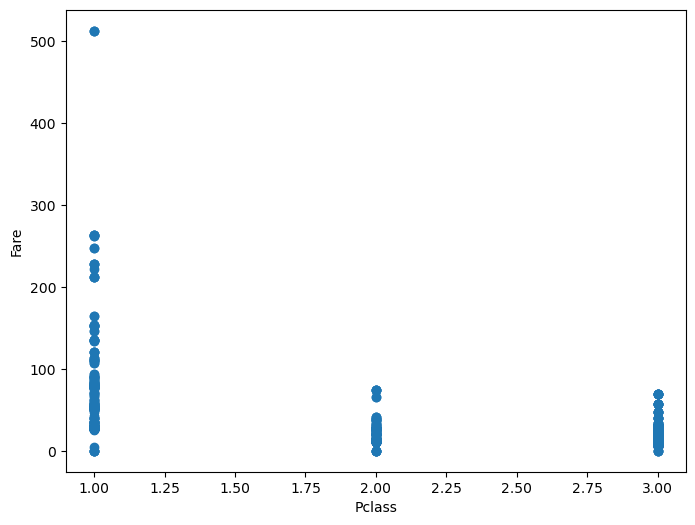

In [9]:
# Streudiagramm: Fare (Plass)
#  X-Index 2 (Pclass), Y-Index 9 (Fare)
dst_scatter_plot(df_train, 2, 9)

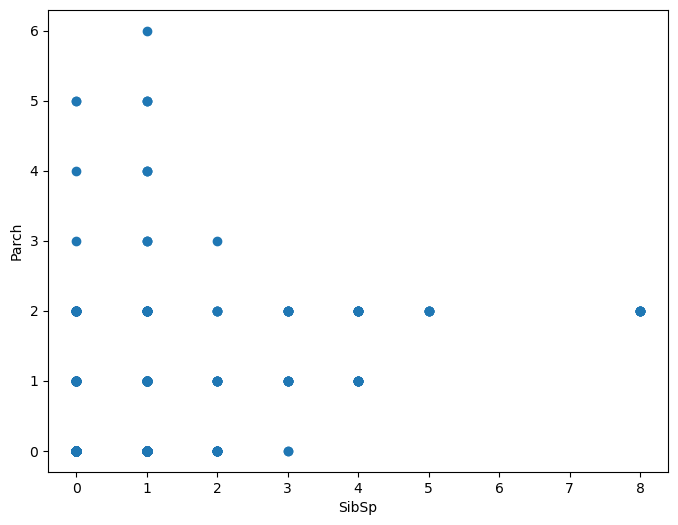

In [10]:
# Streudiagramm: Parch (SibSp)
#  X-Index 6 (SibSp), Y-Index 7 (Parch)
dst_scatter_plot(df_train, 6, 7)

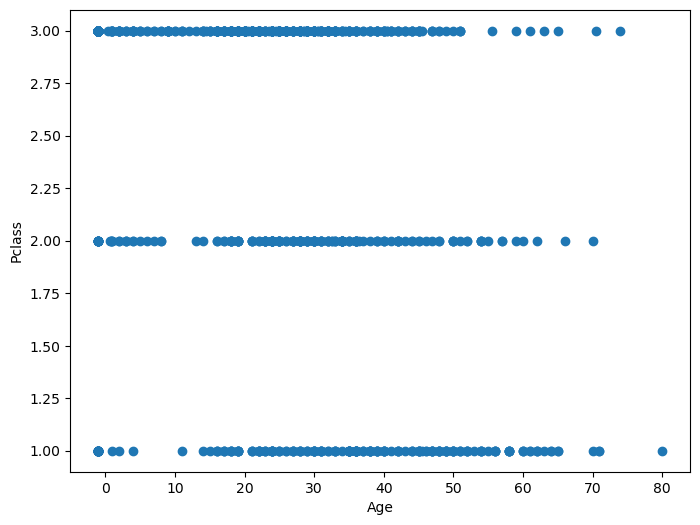

In [11]:
# Streudiagramm: Pclass (Age)
#  X-Index 5 (Age), Y-Index 2 (Pclass)
#  Zunächst müssen hier die fehlenden Werte ersetzt werden (z.B. durch den Wert -1).
df_train['Age'] = df_train['Age'].fillna(-1) # Wir nehmen ein unmögliches Alter
dst_scatter_plot(df_train, 5, 2)

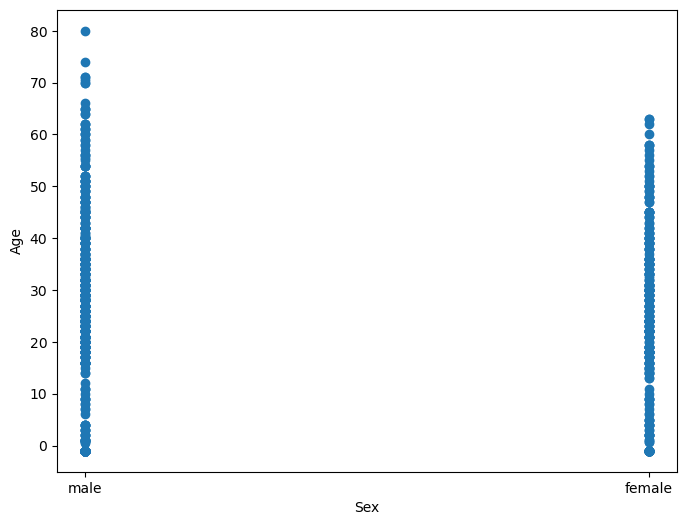

In [12]:
# Streudiagramm: Age (Sex)
#  X-Index 4 (Sex), Y-Index 5 (Age)
dst_scatter_plot(df_train, 4, 5)

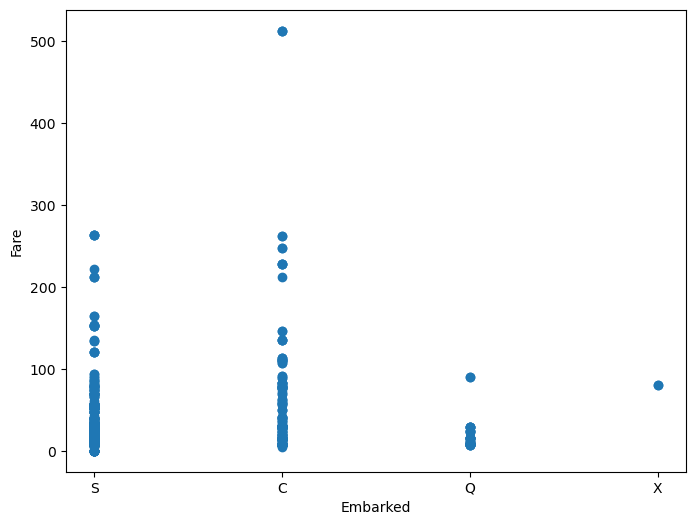

In [13]:
# Streudiagramm: Fare (Embarked)
#  X-Index 11 (Embarked), Y-Index 9 (Fare)
#  Auch hier müssen zunächst die fehlenden Werte ersetzt werden
df_train['Embarked'] = df_train['Embarked'].fillna('X') # Wir nehmen einen unmöglichen Wert
df_train['Fare']     = df_train['Fare'].fillna(-1) # Wir nehmen einen unmöglichen Wert
dst_scatter_plot(df_train, 11, 9)

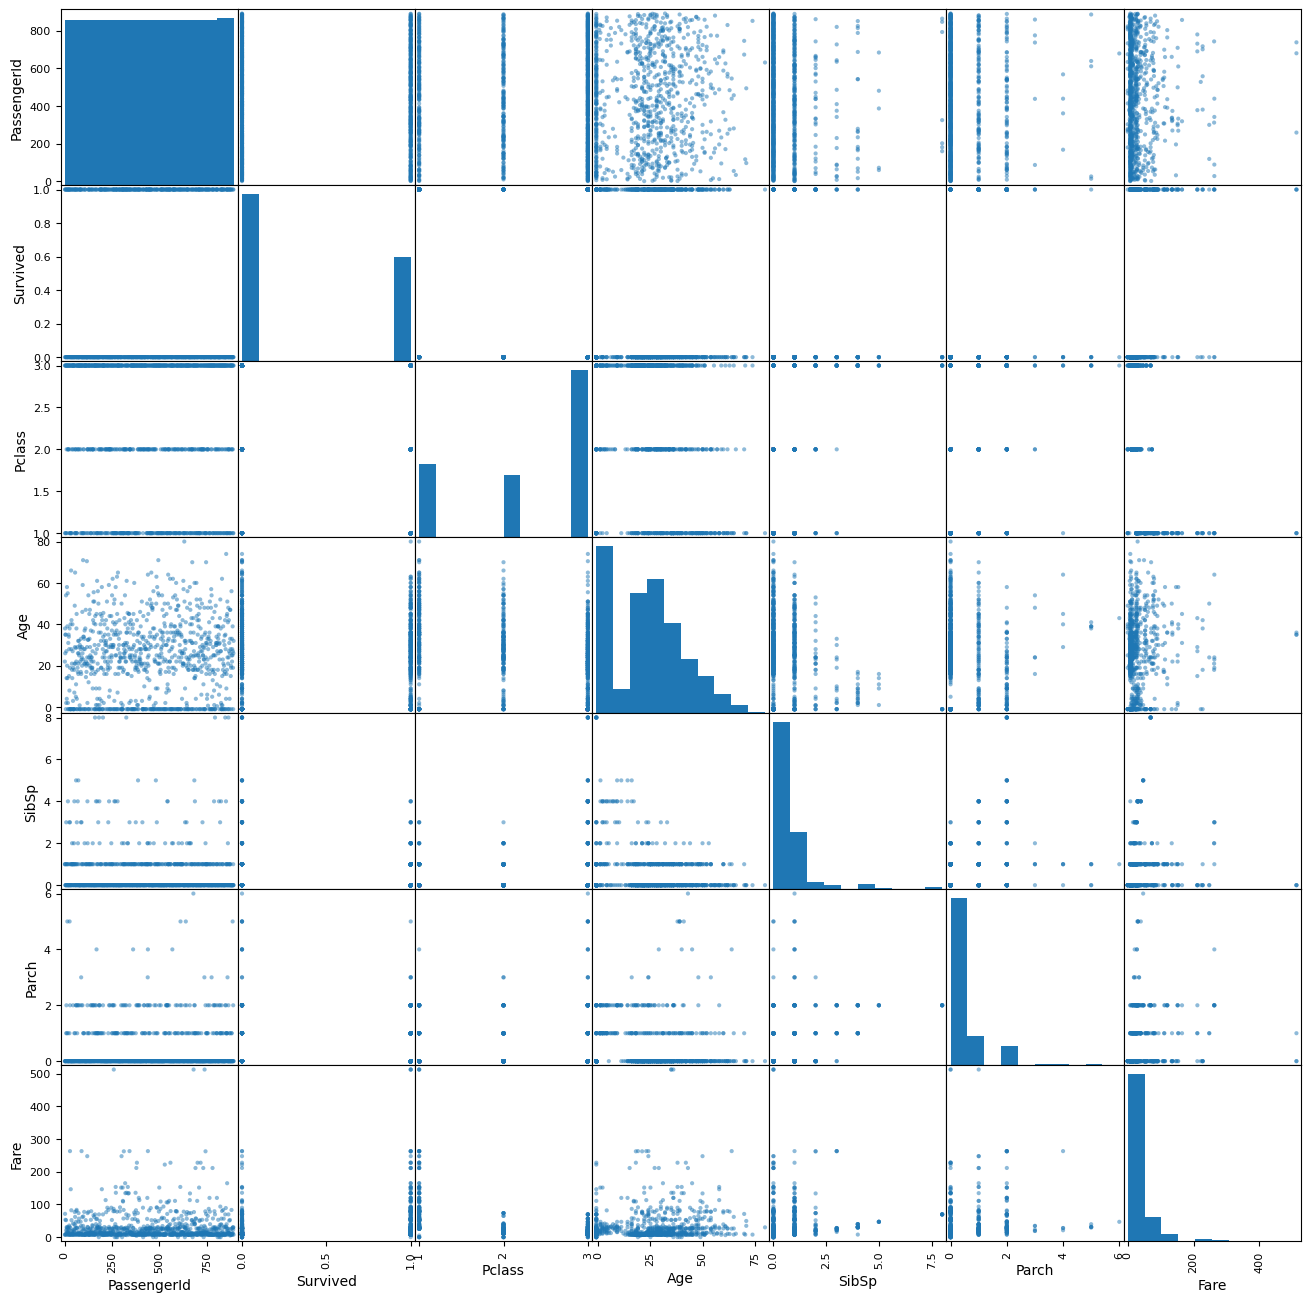

In [14]:
# Scatter Matrix erstellen
#  (KNIME: "Scatter Matrix")
pd.plotting.scatter_matrix(df_train, figsize=(16, 16))
plt.show()

### Trainingsdaten (# 891): Grafische Analyse mittels zweidimensionaler Streudiagrammen

Insbesondere lassen sich Ergebnisse der Korrelationsanalyse hier auch visualisieren,
z.B. (X-Achse vs. Y-Achse):
- Pclass vs. Fare
- Sibsp vs. Parch
- Pclass vs. Age

Während wir in der Korrelationsanalyse nur numerische Attribute betrachtet haben, lassen sich hier auch kategorische Attribute darstellen. Ebenfalls interessant sind bspw.:
- Sex vs. Age
- Embarked vs. Fare

Ergebnisse:
- Es gab sehr viele Männer im Alter zwischen 18 und 40 Jahren im Vergleich zu den Frauen.
- Die älteste Frau war 63 Jahre alt, während der älteste Mann 80 Jahre alt war.
- Passagiere, die in Cherbourg (Frankreich) an Bord gingen, zahlten sehr hohe Ticketpreise.
- Passagiere, die in Queenstown (Irland) zustiegen, zahlten dagegen vergleichsweise wenig.